<a href="https://colab.research.google.com/github/sfansaria/Stress_Detection/blob/main/Stress_detection_nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/My Drive/ml_datasets/stress.csv')

data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [ ]:
data.shape

(2838, 116)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [ ]:
"Rows :", data.shape[0]

('Rows :', 2838)

In [ ]:
"Columns :", data.shape[1]

('Columns :', 116)

In [ ]:
print("Categorical columns :")
data.select_dtypes(include=['object']).apply(pd.Series.nunique,axis=0)

Categorical columns :


subreddit           10
post_id           2343
sentence_range     173
text              2820
dtype: int64

<ipython-input-210-f67dcf210197>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap= "PiYG")


<Axes: >

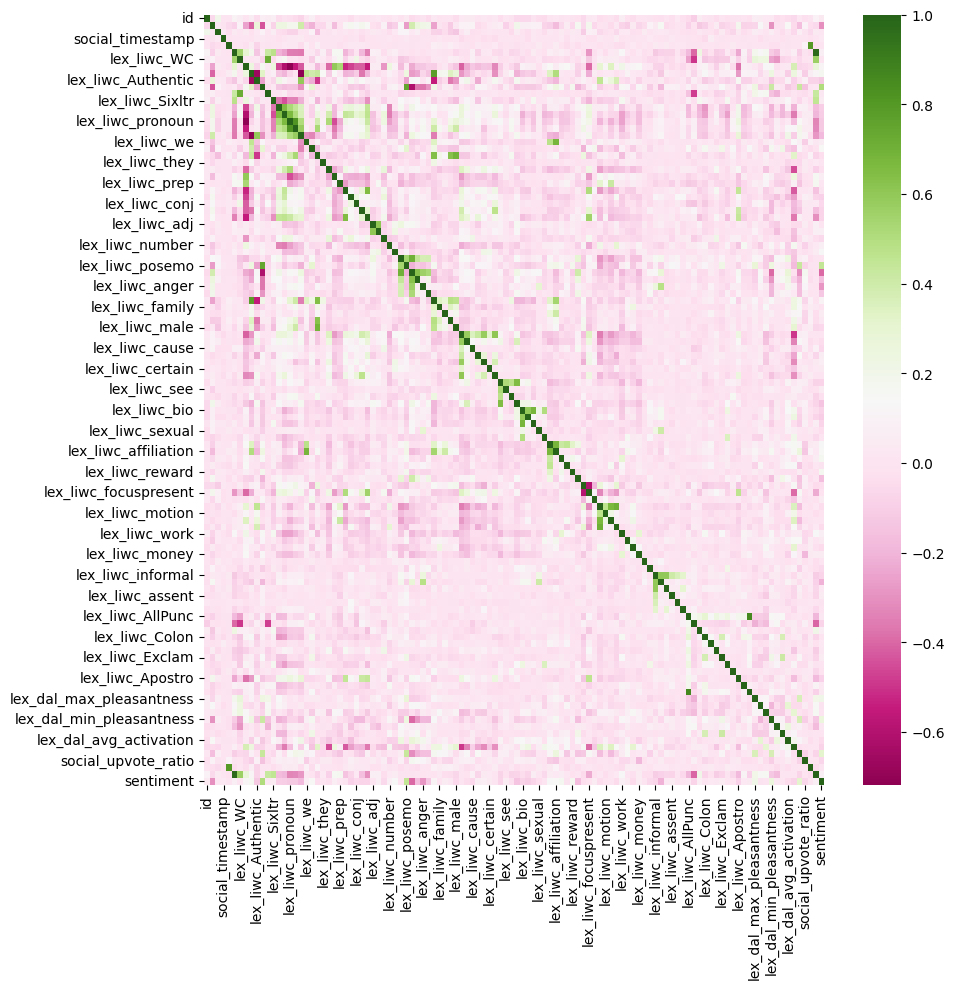

In [ ]:
#Correlation amongst Feature

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), cmap= "PiYG")

In [ ]:
#Check for missing data

data.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [ ]:
from textblob import TextBlob

#Determining the semtiment polarity from words

#Positive Sentiments
print("Positive Sentiment :")
print("Polarity : ",TextBlob("greatest").polarity)
print("Sentiment : ",TextBlob("greatest").sentiment)
print("--------:-)")

print("Negative Sentiment :")
print("Polarity : ",TextBlob("worst").polarity)
print("Sentiment : ",TextBlob("worst").sentiment)
print("--------:-(")

Positive Sentiment :
Polarity :  1.0
Sentiment :  Sentiment(polarity=1.0, subjectivity=1.0)
--------:-)
Negative Sentiment :
Polarity :  -1.0
Sentiment :  Sentiment(polarity=-1.0, subjectivity=1.0)
--------:-(


In [ ]:
#Sentiment Detection

def mood(txt):
  return TextBlob(txt).sentiment.polarity

In [ ]:
#get the text
posts = data[["text"]]
#Adding mood detection as column
posts["sentiment"] = posts["text"].apply(mood)
posts.head()

<ipython-input-214-e90158e85791>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts["sentiment"] = posts["text"].apply(mood)


,text,sentiment
0,"He said he had not felt that way before, sugge...",-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0.292857
2,My mom then hit me with the newspaper and it s...,0.011894
3,"until i met my new boyfriend, he is amazing, h...",0.141671
4,October is Domestic Violence Awareness Month a...,-0.204167


In [ ]:
print("Value Exploration :")
print("Minimum Sentiment :", posts["sentiment"].min())
print("Maximum Sentiment :", posts["sentiment"].max())
print("----------------------")
print("Counts :")
print(posts.sentiment.value_counts())

Value Exploration :
Minimum Sentiment : -1.0
Maximum Sentiment : 1.0
----------------------
Counts :
0.000000    63
0.250000    21
0.100000    19
0.175000    14
0.166667    12
            ..
0.038095     1
0.032727     1
0.166171     1
0.095833     1
0.016667     1
Name: sentiment, Length: 2137, dtype: int64


In [ ]:
from pandas.io.parsers.readers import TextFileReader
#prepare the text column of the dataset to clean the text column with stopwords,links,special symbols and language errors

import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\. \S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '',text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
data["text"] = data["text"].apply(clean)
data["text"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       said felt way sugget go rest trigger ahead you...
1       hey rassist sure right place post goe  im curr...
2       mom hit newspap shock would know dont like pla...
3       met new boyfriend amaz kind sweet good student...
4       octob domest violenc awar month domest violenc...
                              ...                        
2833     week ago precious ignor  jan  happi year prec...
2834    dont abil cope anymor im tri lot thing trigger...
2835    case first time your read post look peopl will...
2836    find normal good relationship main problem see...
2837    talk mom morn said sister trauma wors mine did...
Name: text, Length: 2838, dtype: object

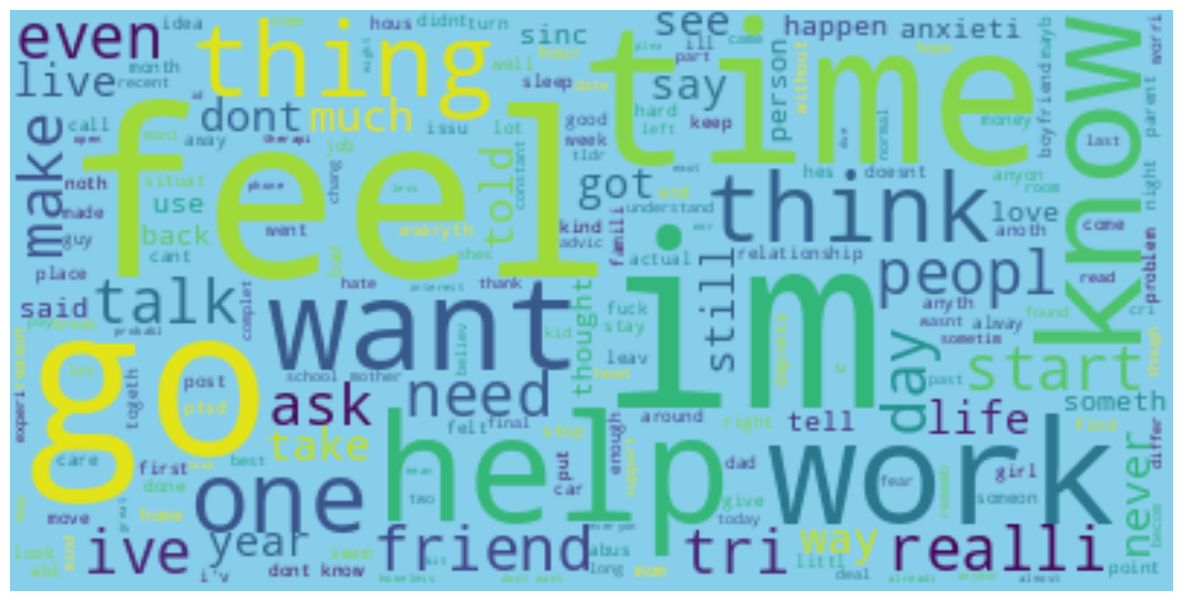

In [ ]:
#look at the most used words by the people sharing about their life problems on social media by visualizing a word cloud of the text column

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="skyblue").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Stress Detection Model

#The label column in this dataset contains labels as 0 and 1. 0 means no stress, and 1 means stress. I will use Stress and No stress labels instead of 1 and 0. So lets prepare this column accordingly and select the text and label columns for the process of training a machine learning model:'''

#data["label"] = data["label"].map({0: "Unstressed", 1: "Stressed"})
#data = data[["text", "label"]]
#print(data.head())

posts["meaning"] = data["label"].map({0: "Unstressed", 1: "Stressed"})
posts.head()

<ipython-input-218-68144f641794>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts["meaning"] = data["label"].map({0: "Unstressed", 1: "Stressed"})


,text,sentiment,meaning
0,"He said he had not felt that way before, sugge...",-0.002742,Stressed
1,"Hey there r/assistance, Not sure if this is th...",0.292857,Unstressed
2,My mom then hit me with the newspaper and it s...,0.011894,Stressed
3,"until i met my new boyfriend, he is amazing, h...",0.141671,Stressed
4,October is Domestic Violence Awareness Month a...,-0.204167,Stressed


<Axes: xlabel='meaning', ylabel='count'>

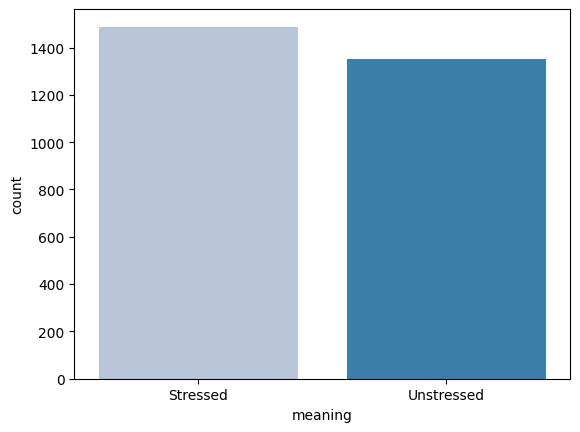

In [ ]:
sns.countplot(x='meaning',data=posts, palette="PuBu")

In [ ]:
#split the dataset into training and test sets

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

#x = np.array(data["text"])
#y = np.array(data["label"])

#Assign variables ; x = features and y = target

x = posts.text
y = posts.meaning

#GaussianNB---> When the features are continuous
#CategoricalNB---> When the data is categorical
#MultinomialNB---> Applied to text data


cv = CountVectorizer(stop_words="english")
X = cv.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mb = MultinomialNB()
m1 = mb.fit(xtrain,ytrain).predict(xtest)
print("Model Accuracy is {p}%".format(p = round(accuracy_score(m1,ytest)*100, 2)))

Model Accuracy is 72.04%


In [ ]:
from sklearn.linear_model import LogisticRegression
m2 = LogisticRegression().fit(xtrain, ytrain)
score = m2.score(xtest, ytest)
#accuracy_score(m2, ytest)
print("Model Accuracy is {p}%".format(p = round(score*100, 2)))

Model Accuracy is 71.72%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
d.fit(xtrain,ytrain)
m3 = d.predict(xtest)
print("Model Accuracy is {p}%".format(p=round(accuracy_score(ytest, m3)*100, 2)))

Model Accuracy is 60.51%


In [ ]:
#The task is based on the problem of binary classification
#Use of the Bernoulli Naive Bayes algorithm -----best algorithm for binary classification problems.
#Train the stress detection model

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)


BernoulliNB()

In [ ]:
#lets test the performance of our model on some random sentences on mental health
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
output


Enter a Text: sometime i feel i need some help


array(['Stressed'], dtype='<U10')